In [86]:
# pip install fredapi
# pip install missingno
import pandas as pd 
from fredapi import Fred
import missingno
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


In [87]:
APIKEY = "3350621adf83e98b7ae0cf60ee5098a1"

In [88]:
fred = Fred(api_key=APIKEY)

columns = ["USREC", "GDPC1", "PIECTR", "PRS85006013", "IPB50001SQ", "CQRMTSPL", "T10Y3M", "T10Y2Y", "BAMLH0A0HYM2", "BAA10Y", "AAAFF", "T10YIE", "T5YIE", "VIXCLS", "GVZCLS","OVXCLS"]

data = []
for column in columns:
    try:
        data.append(fred.get_series(column))
    except:
        print(f"Couldn't get {column}")

In [89]:
df = pd.concat(data, axis = 1)
df.columns = columns

# Muito dado "faltante"...
- Muito dos dados são divulgados apenas mensalmente, enquanto outros são diários.   

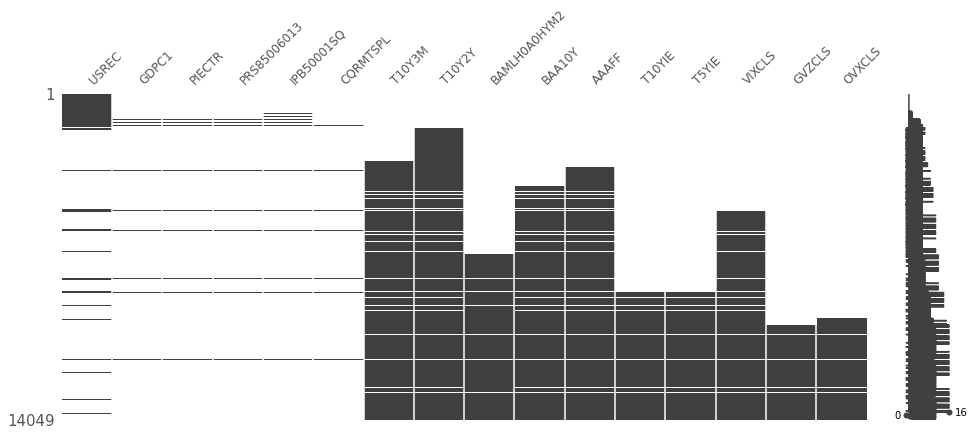

In [90]:
missingno.matrix(df,figsize=(16,6), fontsize=12);

### Separando em dado diário

In [97]:
daily_indexes = ["T10Y3M", "T10Y2Y", "BAMLH0A0HYM2", "BAA10Y", "AAAFF", "T10YIE", "T5YIE", "VIXCLS", "GVZCLS","OVXCLS"]
df_daily = df[daily_indexes]
df_daily = df_daily.dropna(how ="any")

<AxesSubplot:>

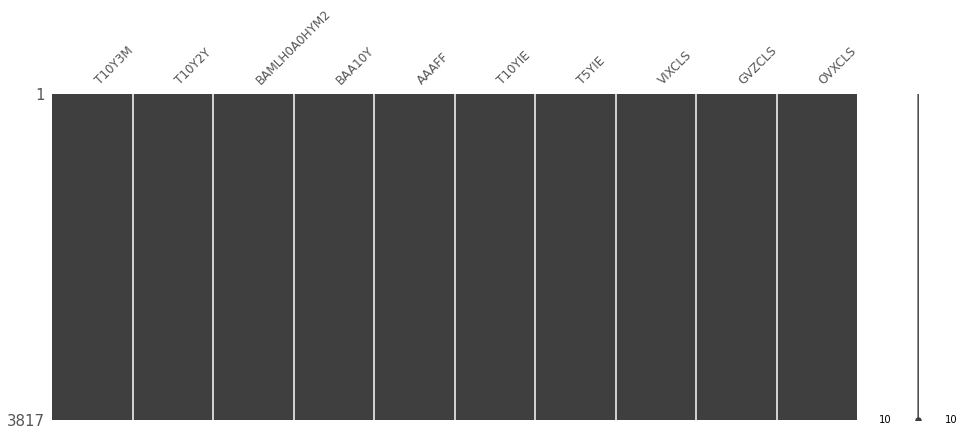

In [92]:
missingno.matrix(df_daily, figsize=(16,6), fontsize=12)

<AxesSubplot:>

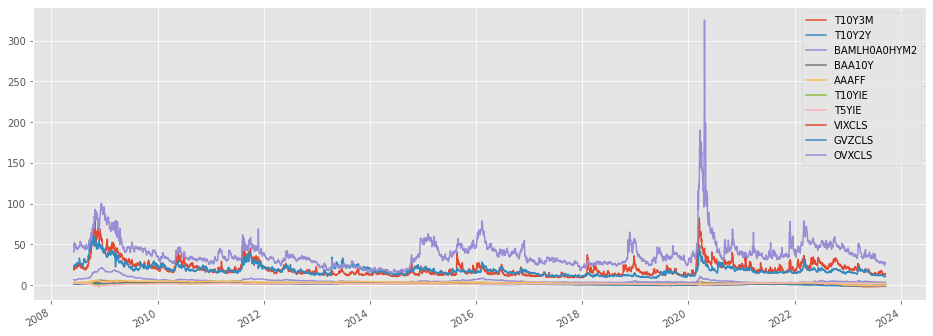

In [93]:
df_daily.plot(figsize = (16, 6))

### Analisando o Spread de Bonds

In [98]:
bond_spread = df_daily[["T10Y3M", "T10Y2Y"]]

Text(0, 0.5, 'Spread (%)')

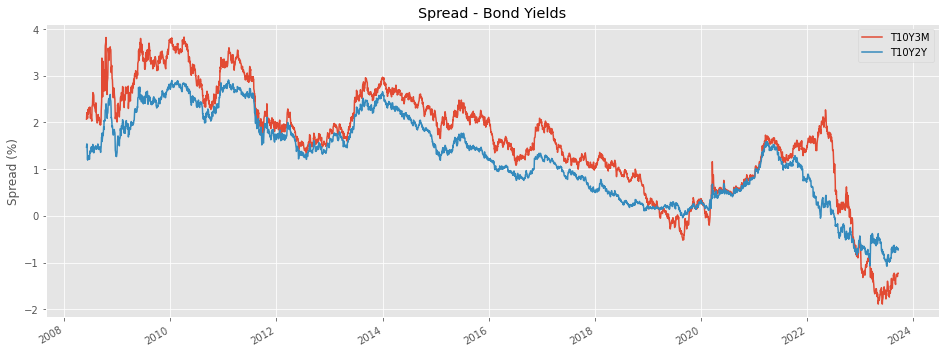

In [105]:
bond_spread.plot(figsize=(16,6))
plt.title("Spread - Bond Yields")
plt.ylabel("Spread (%)")

In [106]:
bond_spread.describe()

,T10Y3M,T10Y2Y
count,3817.000000,3817.000000
mean,1.613301,1.233259
std,1.184933,0.942222
min,-1.890000,-1.080000
25%,1.010000,0.510000
50%,1.690000,1.300000
75%,2.460000,1.950000
max,3.830000,2.910000


### Correlação/Covariância dos Retornos: 

In [116]:
ret = bond_spread.pct_change()
ret.corr()

,T10Y3M,T10Y2Y
T10Y3M,1.00000,0.00967
T10Y2Y,0.00967,1.00000


In [117]:
ret.cov()

,T10Y3M,T10Y2Y
T10Y3M,0.105006,0.000451
T10Y2Y,0.000451,0.020725


### Correlação Covariância da Série

In [118]:
bond_spread.corr()

,T10Y3M,T10Y2Y
T10Y3M,1.000000,0.946156
T10Y2Y,0.946156,1.000000


In [120]:
bond_spread.cov()

,T10Y3M,T10Y2Y
T10Y3M,1.404067,1.056355
T10Y2Y,1.056355,0.887782
